In [2]:
import pandas as pd
df = pd.read_csv('doctor_availability.csv')
df.head()

,Doctor_Name,Specialization,Available_Timings,Available_Date,Hospital_Name,Location,Department_Size,Patient_Influx,Doctor_Ratio,Doctor_Availability
0,Dr. Swati Desai,Dermatology,14,2024-10-01,City Hospital,Kolkata,46,404,0.69,0
1,Dr. Anil Mehra,Pediatrics,11,2024-10-02,City Hospital,Mumbai,54,373,0.87,0
2,Dr. Ravi Kumar,Dermatology,9,2024-10-03,Govt Health Center,New Delhi,61,96,0.54,0
3,Dr. Swati Desai,Pediatrics,12,2024-10-04,City Hospital,Kolkata,57,143,1.97,1
4,Dr. Swati Desai,Pediatrics,10,2024-10-05,Metro Hospital,Kolkata,71,231,0.85,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('doctor_availability.csv')

In [8]:
df['Influx_per_Department'] = df['Patient_Influx'] / df['Department_Size']

In [10]:
categorical_features = ['Doctor_Name', 'Specialization', 'Hospital_Name', 'Location']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough'
)

X = df.drop(['Doctor_Availability', 'Available_Date'], axis=1)
y = df['Doctor_Availability']

In [12]:
X.head()

,Doctor_Name,Specialization,Available_Timings,Hospital_Name,Location,Department_Size,Patient_Influx,Doctor_Ratio,Influx_per_Department
0,Dr. Swati Desai,Dermatology,14,City Hospital,Kolkata,46,404,0.69,8.782609
1,Dr. Anil Mehra,Pediatrics,11,City Hospital,Mumbai,54,373,0.87,6.907407
2,Dr. Ravi Kumar,Dermatology,9,Govt Health Center,New Delhi,61,96,0.54,1.573770
3,Dr. Swati Desai,Pediatrics,12,City Hospital,Kolkata,57,143,1.97,2.508772
4,Dr. Swati Desai,Pediatrics,10,Metro Hospital,Kolkata,71,231,0.85,3.253521


In [14]:
X_transformed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [22]:
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Akshay\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
dnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6203 - loss: 0.7624 - val_accuracy: 0.8700 - val_loss: 0.2970
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8645 - loss: 0.3164 - val_accuracy: 0.9131 - val_loss: 0.2035
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9022 - loss: 0.2341 - val_accuracy: 0.9400 - val_loss: 0.1355
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9158 - loss: 0.1942 - val_accuracy: 0.9719 - val_loss: 0.0896
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9282 - loss: 0.1666 - val_accuracy: 0.9787 - val_loss: 0.0748
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9325 - loss: 0.1645 - val_accuracy: 0.9744 - val_loss: 0.0815
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9327 - loss: 0.1612 - val_accuracy: 0.9831 - val_loss: 0.0686
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9343 - loss: 0.1493 - val_accuracy: 0.

In [28]:
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print(f"Enhanced DNN Model Accuracy: {dnn_accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.0601
Enhanced DNN Model Accuracy: 97.40%


In [30]:
from sklearn.model_selection import train_test_split
dnn_model.save('doctor_availability_model.h5')
print("Model saved as doctor_availability_model.h5")

Model saved as doctor_availability_model.h5


In [32]:
dnn_model.save('my_model.keras')
print('succeffuly saved')

succeffuly saved


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


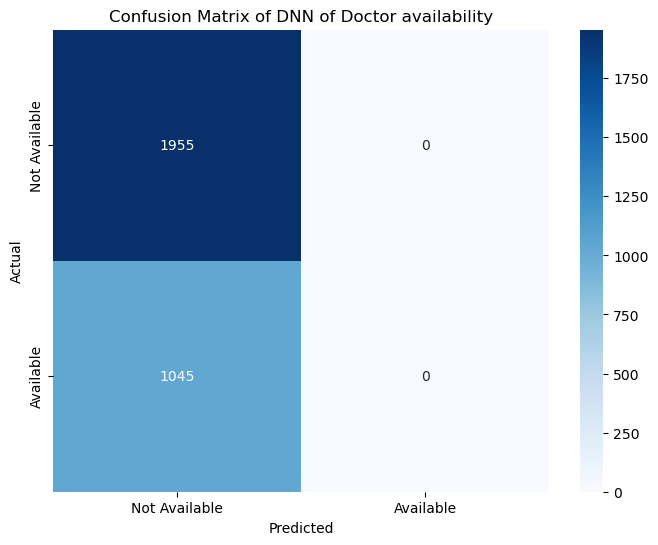

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict on the test set
y_pred = (dnn_model.predict(X_test) > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Available', 'Available'], yticklabels=['Not Available', 'Available'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of DNN of Doctor availability')
plt.show()



In [38]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Available', 'Available']))

Classification Report:
               precision    recall  f1-score   support

Not Available       0.98      0.98      0.98      1299
    Available       0.96      0.96      0.96       701

     accuracy                           0.97      2000
    macro avg       0.97      0.97      0.97      2000
 weighted avg       0.97      0.97      0.97      2000



In [40]:
# Print accuracy
accuracy = np.sum(y_test == y_pred.flatten()) / len(y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 97.40%


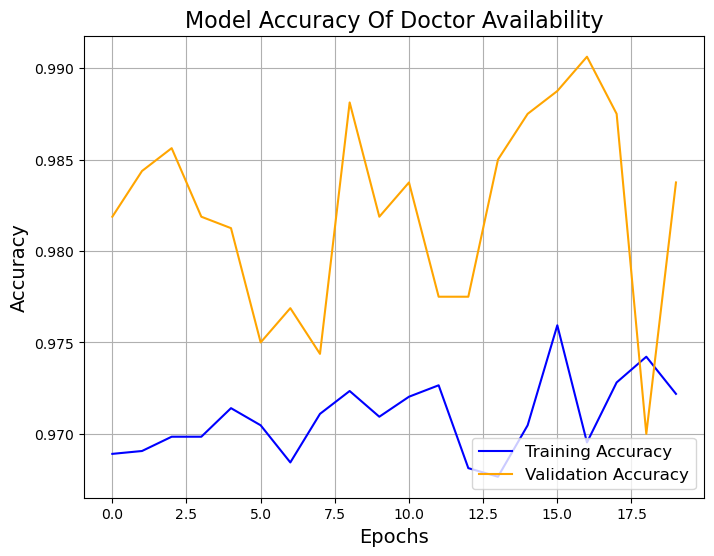

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize arrays to store accuracies
train_accuracies = []
val_accuracies = []

# Train the model with manual accuracy tracking
for epoch in range(20):  # Replace 20 with the actual number of epochs
    history = dnn_model.fit(
        X_train, y_train,
        epochs=1, batch_size=32,
        validation_split=0.2,
        verbose=0  # Set verbose to 0 to suppress the training output
    )

    # Extract accuracies for this epoch
    train_acc = history.history['accuracy'][0]
    val_acc = history.history['val_accuracy'][0]

    # Store the accuracies
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Of Doctor Availability', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

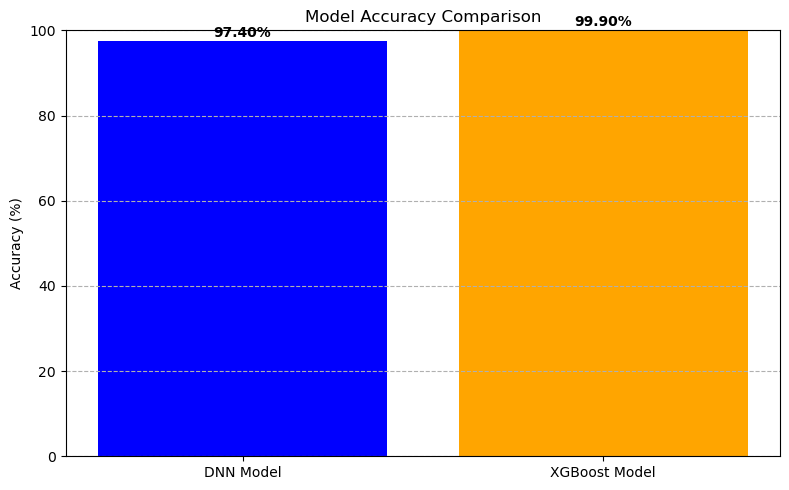

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Sample accuracies (replace these with your actual accuracy values)
dnn_accuracy = 97.40  # Replace with your DNN model accuracy (in percentage)
xgb_accuracy = 99.90  # Replace with your XGBoost model accuracy (in percentage)

# Model names and their corresponding accuracies
models = ['DNN Model', 'XGBoost Model']
accuracies = [dnn_accuracy, xgb_accuracy]

# Create the bar graph
plt.figure(figsize=(8, 5))  # Set the figure size
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--')

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
sns.set(style="whitegrid")

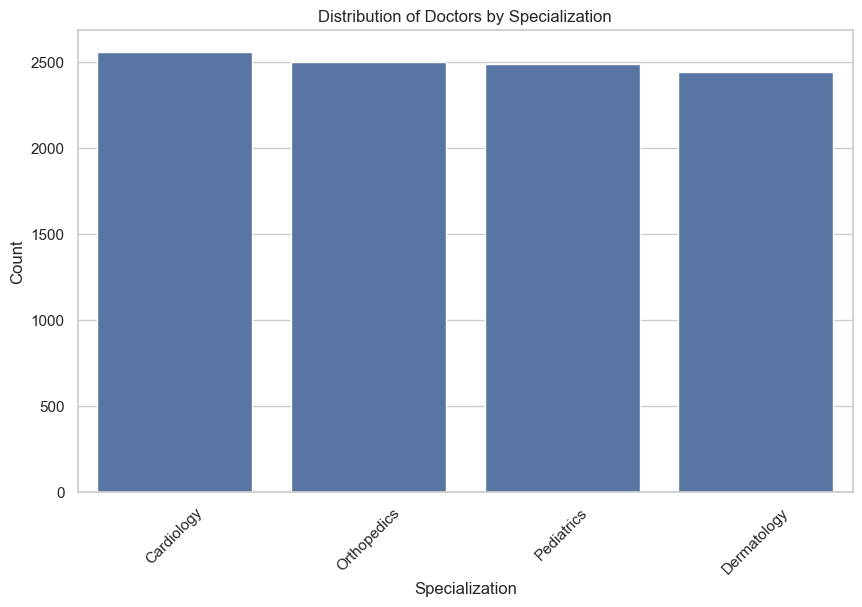

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Specialization', order=df['Specialization'].value_counts().index)
plt.title('Distribution of Doctors by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

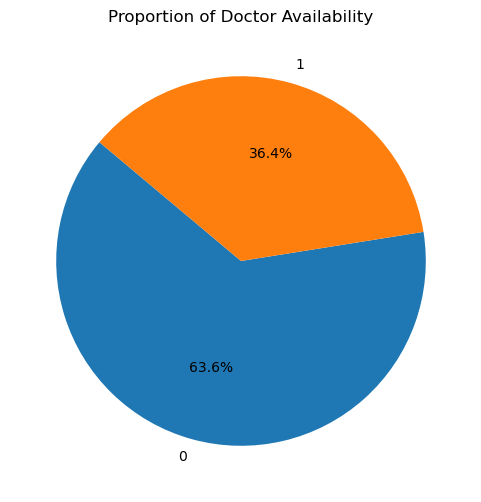

In [122]:
availability_counts = df['Doctor_Availability'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(availability_counts, labels=availability_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Doctor Availability')
plt.show()

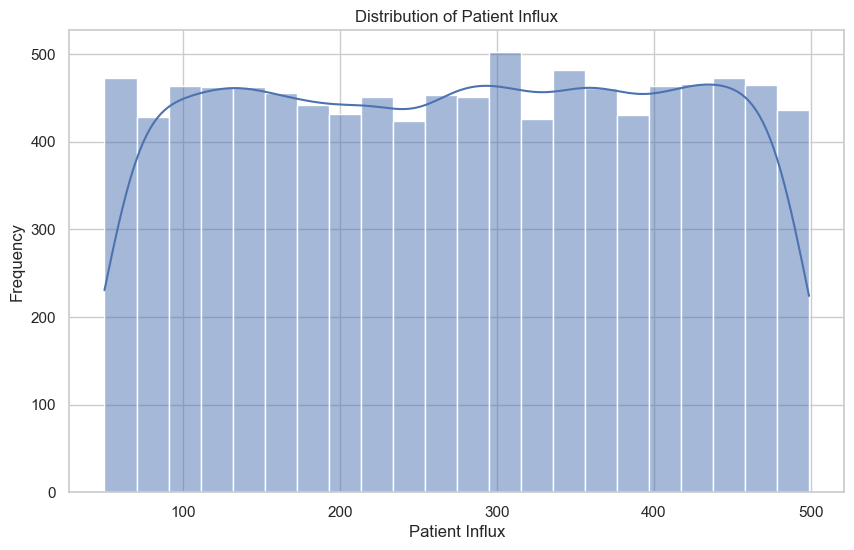

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Patient_Influx'], kde=True)
plt.title('Distribution of Patient Influx')
plt.xlabel('Patient Influx')
plt.ylabel('Frequency')
plt.show()

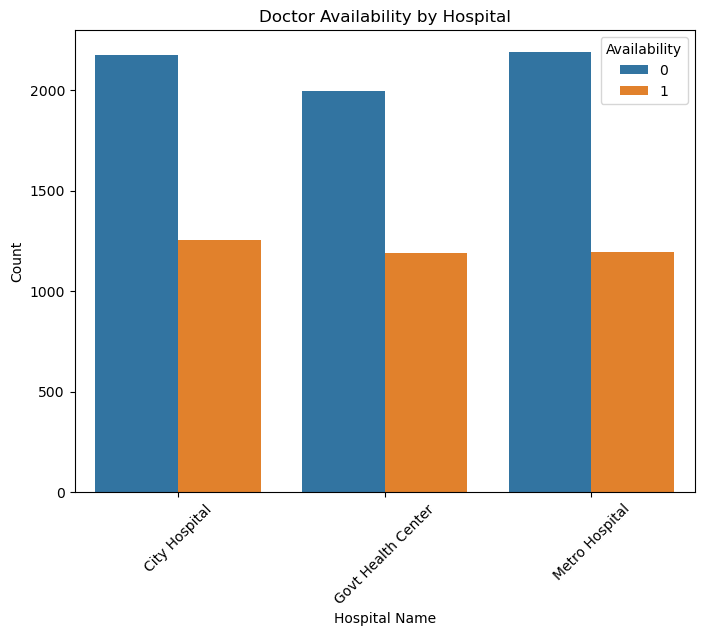

In [124]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Hospital_Name', hue='Doctor_Availability')
plt.title('Doctor Availability by Hospital')
plt.xlabel('Hospital Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability', loc='upper right')
plt.show()

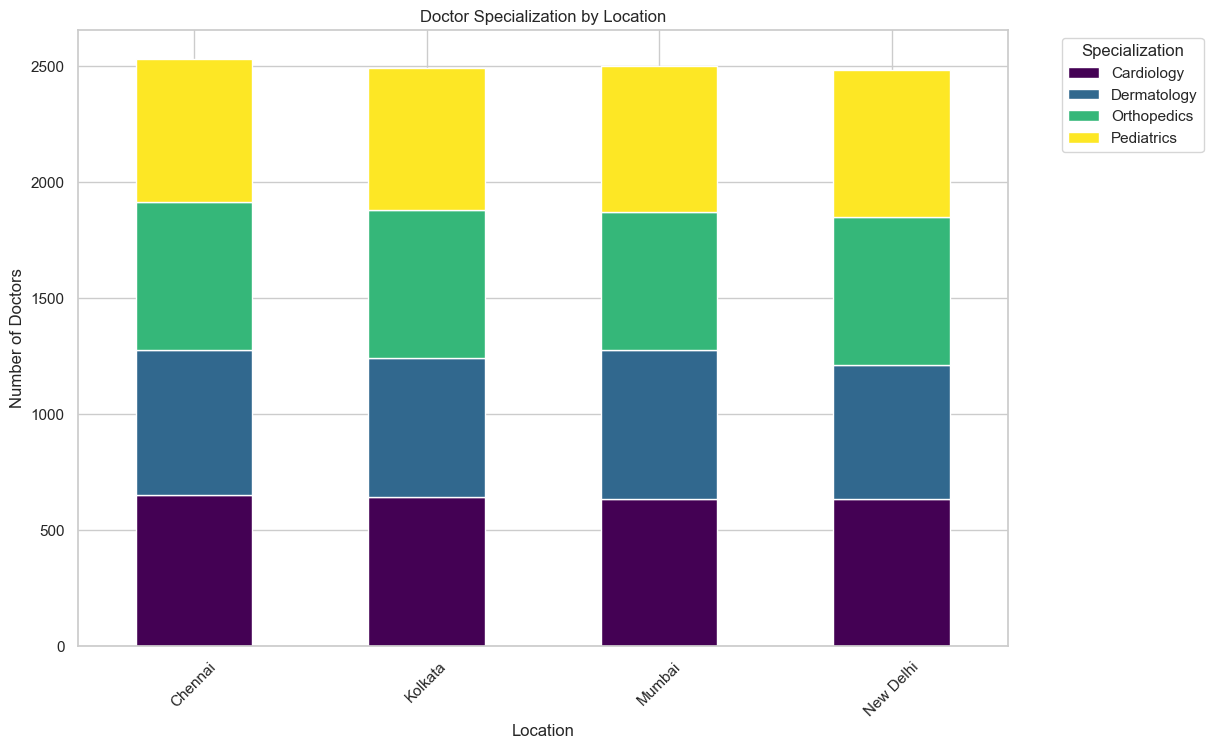

In [67]:
specialization_location = df.groupby(['Location', 'Specialization']).size().unstack()
specialization_location.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Doctor Specialization by Location')
plt.xlabel('Location')
plt.ylabel('Number of Doctors')
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

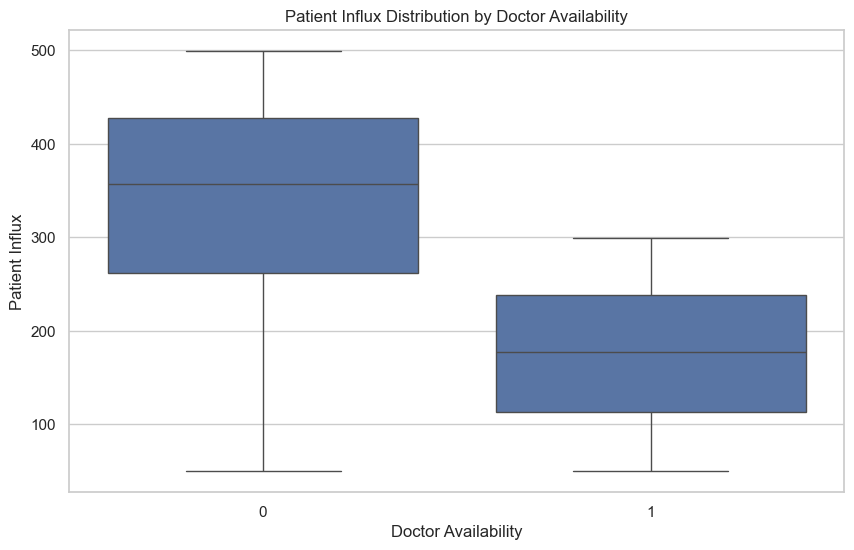

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Doctor_Availability', y='Patient_Influx')
plt.title('Patient Influx Distribution by Doctor Availability')
plt.xlabel('Doctor Availability')
plt.ylabel('Patient Influx')
plt.show()

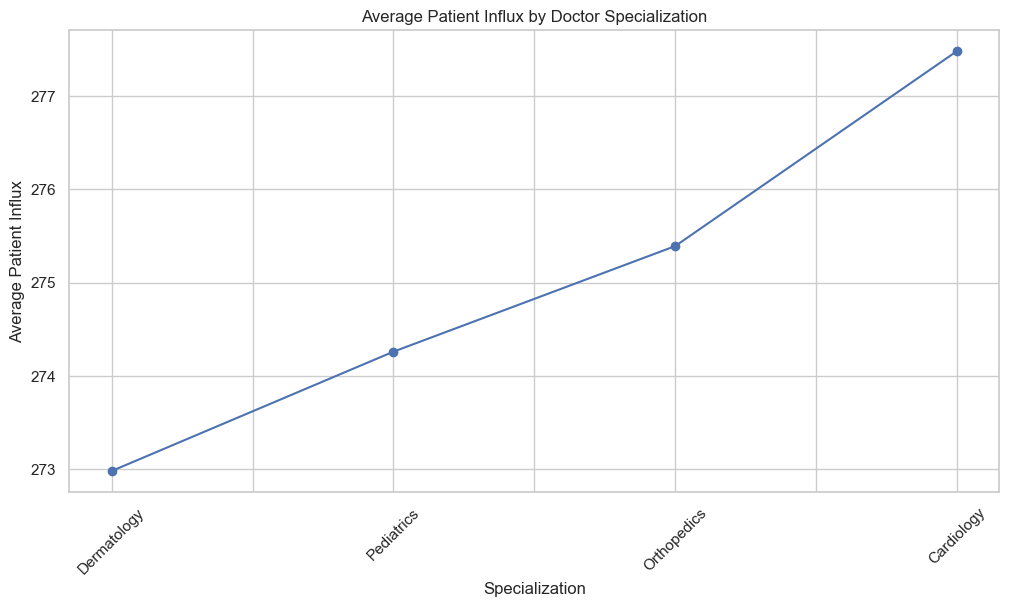

In [71]:
plt.figure(figsize=(12, 6))
specialization_influx = df.groupby('Specialization')['Patient_Influx'].mean().sort_values()
specialization_influx.plot(kind='line', marker='o', color='b')
plt.title('Average Patient Influx by Doctor Specialization')
plt.xlabel('Specialization')
plt.ylabel('Average Patient Influx')
plt.xticks(rotation=45)
plt.show()

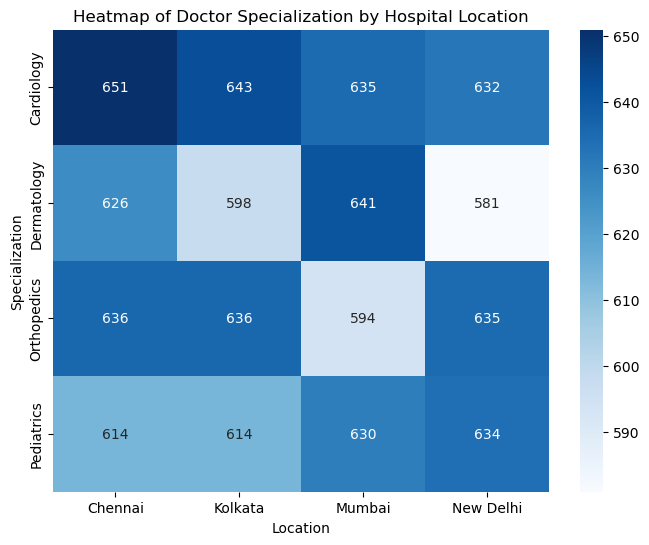

In [28]:
plt.figure(figsize=(8, 6))
specialization_location_matrix = pd.crosstab(df['Specialization'], df['Location'])
sns.heatmap(specialization_location_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Heatmap of Doctor Specialization by Hospital Location')
plt.xlabel('Location')
plt.ylabel('Specialization')
plt.show()

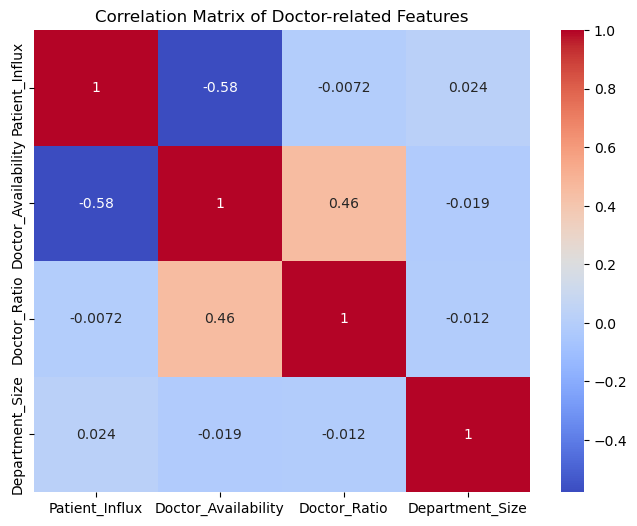

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant doctor-related columns
# Assuming the dataset includes features like 'Patient_Influx', 'Doctor_Availability', 'Doctor_Ratio', and others
doctor_corr_features = df[['Patient_Influx', 'Doctor_Availability', 'Doctor_Ratio', 'Department_Size']]

# Calculate correlations
plt.figure(figsize=(8, 6))
sns.heatmap(doctor_corr_features.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Doctor-related Features')
plt.show()


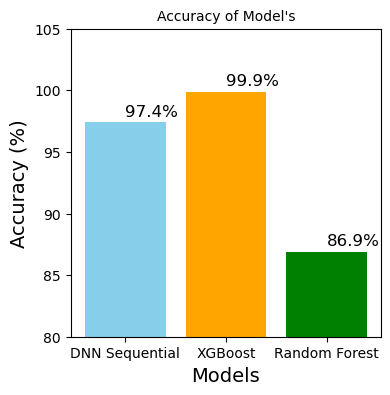

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Model Accuracy Comparison
models = ['DNN Sequential', 'XGBoost', 'Random Forest']
accuracy = [97.40, 99.90, 86.90]

# Set up the bar plot
plt.figure(figsize=(4, 4))
plt.bar(models, accuracy, color=['skyblue', 'orange', 'green'])

# Adding titles and labels
plt.title("Accuracy of Model's", fontsize=10)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(80, 105)  # Set y-axis limits for better visual comparison

# Display accuracy values on top of the bars
for i, value in enumerate(accuracy):
    plt.text(i, value + 0.5, f'{value}%', fontsize=12)

# Show the plot
plt.show()


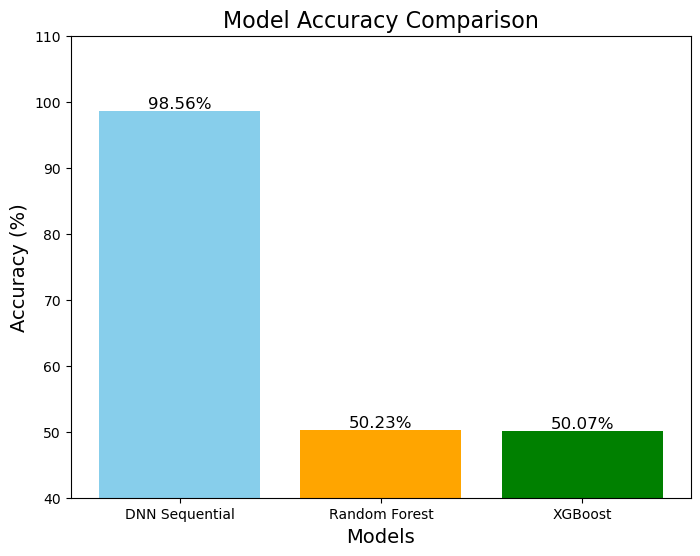

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Model Accuracy Comparison
models = ['DNN Sequential', 'Random Forest', 'XGBoost']
accuracy = [98.56, 50.23, 50.07]

# Set up the bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['skyblue', 'orange', 'green'])

# Adding titles and labels
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(40, 110)  # Set y-axis limits for better visual comparison

# Display accuracy values on top of the bars
for i, value in enumerate(accuracy):
    plt.text(i, value + 0.5, f'{value}%', ha='center', fontsize=12)

# Show the plot
plt.show()
